
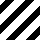
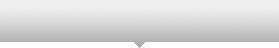
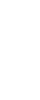
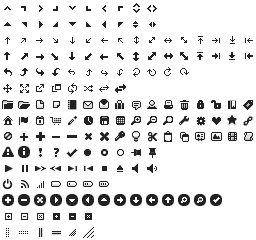
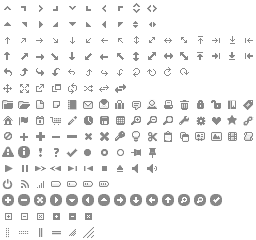
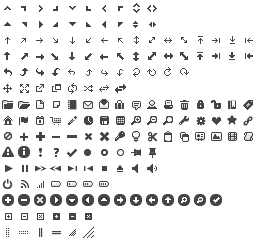
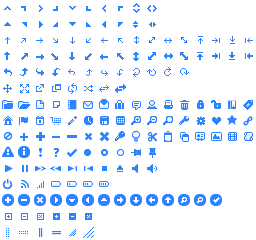
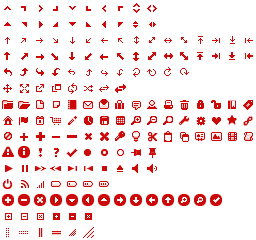
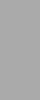
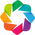
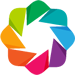
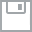
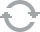
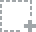
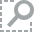
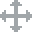
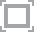
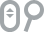

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from matplotlib import pyplot as plt
import requests, json
import numpy as np
from bokeh.plotting import *
output_notebook()

In [2]:
client = requests.Session()

In [3]:
filename = '/data/openmsi/omsi_data/20120711_Brain.h5'
dataIndex = '0'
expIndex = '0'

In [4]:
payload = {'file':filename,
          'expIndex':expIndex,'dataIndex':dataIndex,'qspectrum_viewerOption':'0',
          'qslice_viewerOption':'0',
          'col':0,'row':0,
          'findPeak':'0','format':'JSON'}
url = 'https://openmsi.nersc.gov/openmsi/qmz'
r = client.get(url,params=payload)
data = json.loads(r.content)
mz = np.asarray(data[u'values_spectra'])

In [5]:
idx = np.where(abs(mz-868.6)<0.2)
payload = {'file':filename,
           'expIndex':expIndex,'dataIndex':dataIndex,'format':'JSON','mz':'%d:%d'%(min(idx[0]),max(idx[0]))}
url = 'https://openmsi.nersc.gov/openmsi/qcube'
r = client.get(url,params=payload)
data = np.asarray(json.loads(r.content))
im0 = np.sum(data,2)

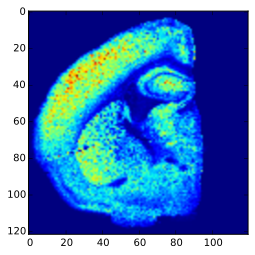

In [6]:
plt.imshow(np.sum(data,2))
plt.show()

In [7]:
myRow = 40
myCol = 40
payload = {'file':filename,
              'expIndex':expIndex,'dataIndex':dataIndex,'qspectrum_viewerOption':'0',
              'qslice_viewerOption':'0',
              'col':myCol,'row':myRow,
              'findPeak':'0','format':'JSON'}
url = 'https://openmsi.nersc.gov/openmsi/qspectrum'
r = client.get(url,params=payload)
data = json.loads(r.content)
intensity  = data[u'spectrum']

In [10]:


# create a new plot with a title and axis labels
p = figure(title='Spectrum at location [%d,%d]'%(myRow,myCol), x_axis_label='m/z', y_axis_label='Intensity',plot_width=1000, plot_height=500)


p.line(mz, intensity, y_range=[0,1.05*np.max(intensity)])

show(p)

In [ ]:
# https://openmsi.nersc.gov/openmsi/qcube/?file=%2Fproject%2Fprojectdirs%2Fopenmsi%2Fomsi_data_private%2Fbpb%2F2012_0403_KBL_platename_SN1.h5&format=HDF5
# https://openmsi.nersc.gov/openmsi/qcube/?file=%2Fproject%2Fprojectdirs%2Fopenmsi%2Fomsi_data_private%2Fbpb%2FSample_2014_07_09_Sample95_RegionD.h5&expIndex=0&anaIndex=2&format=JSON&anaDataName=wo
# https://openmsi.nersc.gov/openmsi/qcube/
#     ?file=%2Fproject%2Fprojectdirs%2Fopenmsi%2Fomsi_data_private%2Fbpb%2FSample_2014_07_09_Sample95_RegionD.h5
#     &expIndex=0&anaIndex=2&format=JSON&anaDataName=wo
    

In [29]:
# anaIndex = 1
# expIndex = 0
# payload = {'file':filename,
#               'expIndex':expIndex,'anaIndex':anaIndex,
#               'anaDataName':'wo','format':'JSON'}
# url = 'https://openmsi.nersc.gov/openmsi/qcube'
# r = client.get(url,params=payload)
# data = (json.loads(r.text))


In [ ]:
# print len(data)
# np.asarray(data).shape

In [39]:
# x = np.arange(697)
# y = np.asarray(data)
# p1 = line(x, y[:,0], plot_width=400, plot_height=500,
#          title='Spectrum at location [%d,%d]'%(myRow,myCol),
#          x_axis_label='m/z', y_axis_label='Intensity')
# p2 = line(x, y[:,1], plot_width=400, plot_height=500,
#          title='Spectrum at location [%d,%d]'%(myRow,myCol),
#          x_axis_label='m/z', y_axis_label='Intensity')
# gridplot([[p1,p2]])
# show()